<a href="https://colab.research.google.com/github/gorzanskik-ai/statistics/blob/main/03_data_distribution/03_central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/statistics/data/bus-breakdown-and-delays.csv"

Mounted at /content/drive


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statistics import mean

In [45]:
delays = pd.read_csv(path, usecols=['How_Long_Delayed'])
delays.head(10)

,How_Long_Delayed
0,NaN
1,20MNS
2,15MIN
3,15 MIN
4,NaN
5,30 min
6,20MINS
7,15
8,30 mins
9,20


In [47]:
delays['Delay'] = delays['How_Long_Delayed'].str.extract('(\d+)')   #extract only numbers
#delays['is_canceled'] = delays['Delay'].isnull()
delays.dropna(inplace=True)
#delays = delays[~delays['is_canceled']][['Delay']]
delays['Delay'] = pd.to_numeric(delays['Delay'])
delays.drop(['How_Long_Delayed'], axis=1, inplace=True)
delays.head(10)

,Delay
1,20
2,15
3,15
5,30
6,20
7,15
8,30
9,20
10,20
11,30


probe size: 5
population mean: 28.392954357291337
mean of means: 25.838
standard error: 173.39653773813959
--------------------


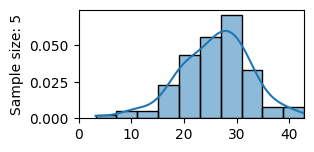

probe size: 10
population mean: 28.392954357291337
mean of means: 26.406000000000002
standard error: 122.60986766890761
--------------------


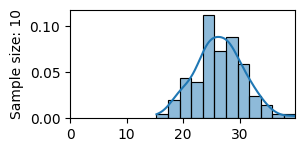

probe size: 20
population mean: 28.392954357291337
mean of means: 32.6535
standard error: 86.69826886906979
--------------------


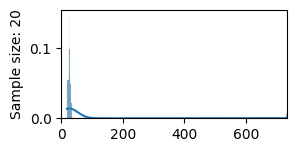

probe size: 30
population mean: 28.392954357291337
mean of means: 26.208333333333336
standard error: 70.7888401039482
--------------------


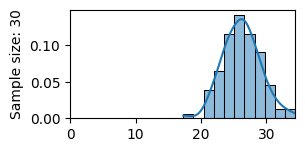

probe size: 50
population mean: 28.392954357291337
mean of means: 31.354
standard error: 54.832799763986216
--------------------


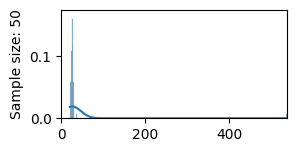

probe size: 100
population mean: 28.392954357291337
mean of means: 27.0025
standard error: 38.77264454455878
--------------------


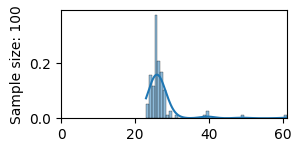

In [59]:
mean = delays['Delay'].mean()
std = delays['Delay'].std()

size_of_probe = [5, 10, 20, 30 , 50, 100]
num_of_probes = 100
idx = 1

means = []
for i in size_of_probe:
    means = []
    for j in range(num_of_probes):
        probe = delays['Delay'].sample(i)
        means.append(probe.mean())
    print(f'probe size: {i}')
    print(f'population mean: {mean}')
    print(f'mean of means: {np.mean(means)}')
    print(f'standard error: {std / math.sqrt(i)}')
    print(20 * '-')

    plt.subplot(math.ceil(len(size_of_probe)/2), 2, idx)
    plt.xlim(0, max(means))
    plt.ylabel('Sample size: ' + str(i))
    sns.histplot(means, stat='density', kde=True)
    plt.show()
    idx += 1